# Explicit central difference stencil
Python `for` loops, too slow.

Python 3 works, 2020/07/09.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.interpolate import interp1d
import numpy as np
import os

In [3]:
np.set_printoptions(precision=3)

In [4]:
font = {'family':'Times New Roman','weight':'heavy','size': 18}
plt.rc('font',**font)
plt.rcParams.update({'mathtext.default':  'regular' })
fig = plt.figure(figsize = (7,5),facecolor='w')  

<Figure size 504x360 with 0 Axes>

# Explicit central difference stencil
Definicions:
$$t_n = n \Delta t,~ n = 0, \ldots, N-1,$$

$$x_j = j \Delta x,~ j = 0, \ldots, J-1,$$
<br>

<font color = 'blue'> 
$$
U_j^{n+1} = U_j^{n} + \frac{D\Delta t}{\Delta x^2}(U_{i+1}^n-2U_{i}^n+U_{i-1}^n)
$$
<br>
$$
U_0^{n+1} = -\frac{D}{2k_u\Delta x} + \frac{1}{2} \sqrt{\Big(\frac{D}{k_u \Delta x}\Big)^2 + \frac{4DU_1^n}{k_u \Delta x} + \frac{4\Gamma_{inc}^n}{k_u}}
$$
<br>
$$
U_{J-1}^{n+1} = -\frac{D}{2k_d\Delta x} + \frac{1}{2} \sqrt{\Big(\frac{D}{k_d \Delta x}\Big)^2 + \frac{4DU_{J-2}^n}{k_d \Delta x}}
$$
</font>

In [5]:
def timestep(Un,h,c,D,ku,kd,F=0):
    '''Un - concentration profile on the previous time step
    h - coordinate step, c - time step
    D - diffusion coefficient, ku,kd - recombination coeff. upstream/downstream
    '''
    Unew = [Un[ij]*(1-2*D*c/h**2) + D*c/h**2*(Un[ij+1]+Un[ij-1]) for ij, u in enumerate(Un[1:-1])]
    upstream = [-D/(2*ku*h)+0.5*((D/(ku*h))**2 + 4*D*Un[1]/(ku*h)+4*F/ku)**0.5]
    downstream = [-D/(2*kd*h)+0.5*((D/(kd*h))**2 + 4*D*Un[-2]/(kd*h))**0.5]
    return upstream + Unew + downstream

In [13]:
L = 20e-6;'m'
T = 10;'sec'
ku = 1e-28; kd = 1e-25
T_membrane = 573.0
D=2.9e-7*np.exp(-0.23*1.6e-19/(1.38e-23*T_membrane)) # Diffusion coeffitient for U

J = 20 ;'length'
dx = float(L)/float(J-1) # Grid step
x_grid = np.array([j*dx for j in range(J)]) # Spatial Grid

sigma = 1e-1
dt = sigma*2.*dx**2/D
print('%.3e:\tdt'% dt)
N = int(T/dt)
print('%.2e:\tN'%N)
print('%.3e:\tsigma'% sigma)
t_grid = np.array([n*dt for n in range(N)]) # Time grid

suffix = '_%.0e_s'%dt
U = np.array([0.0 for i in range(J)])

out = []
gin = []

end = T*0.8; flux = 1e18
g_inc = np.array([[-1,0],[0,0],[0.01,flux],[end,flux],[end+.01*end,0],[T+.1*T,0]])
ff = interp1d(g_inc[:,0],g_inc[:,1])
F = ff(t_grid)
Un = U
#plot(x_grid/L,Un,'ko')
N_run = N
color_idx = np.linspace(0,1,N_run)
for i in range(N_run):
    z = timestep(Un,dx,dt,D,ku,kd, F = F[i])
    out.append(z[-1]**2*kd)
    gin.append(z[0]**2*ku)
    Un = z

8.023e-05:	dt
1.25e+05:	N
1.000e-01:	sigma


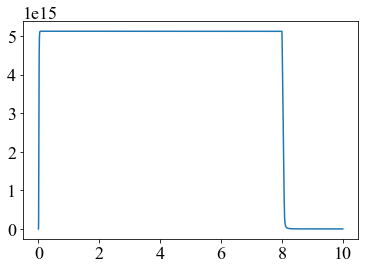

In [7]:
t = len(gin)
plot(t_grid[:t],gin)

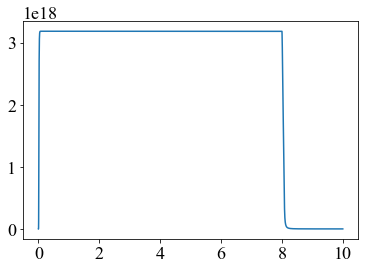

In [8]:
t = len(out)
plot(t_grid[:t],out)

In [9]:
u0 = np.array([0.,1.,2.,3.,4.,5.])
u1 = np.zeros(len(u0))
print(u0, u1, u0[1:-1], u0[-1])

[0. 1. 2. 3. 4. 5.] [0. 0. 0. 0. 0. 0.] [1. 2. 3. 4.] 5.0


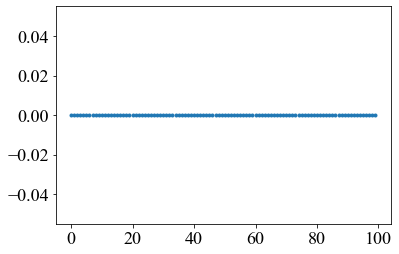

In [10]:
ku = np.linspace(1e-35,1e-25,100)
y = -1/(2*ku*1)+0.5*((1/(ku*1))**2 + 4*1*1/(ku*1)+4*1/ku)**0.5
plot(y,'.')